In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("datasets/data.csv")

In [3]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,year
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0,2018
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0,2018
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0,2018
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0,2018
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0,2018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     1994 non-null   object 
 1   Open                          1994 non-null   float64
 2   High                          1994 non-null   float64
 3   Low                           1994 non-null   float64
 4   Close                         1994 non-null   float64
 5   Volume                        1994 non-null   float64
 6   Close time                    1994 non-null   object 
 7   Quote asset volume            1994 non-null   float64
 8   Number of trades              1994 non-null   int64  
 9   Taker buy base asset volume   1994 non-null   float64
 10  Taker buy quote asset volume  1994 non-null   float64
 11  Ignore                        1994 non-null   int64  
 12  year                          1994 non-null   int64  
dtypes: 

In [5]:
df["Close time"] = pd.to_datetime(df["Close time"], unit = "ns")
df["Close time"] = df["Close time"].dt.date

In [6]:
df = df.set_index(df["Close time"])

### We are interested in `Close Price`

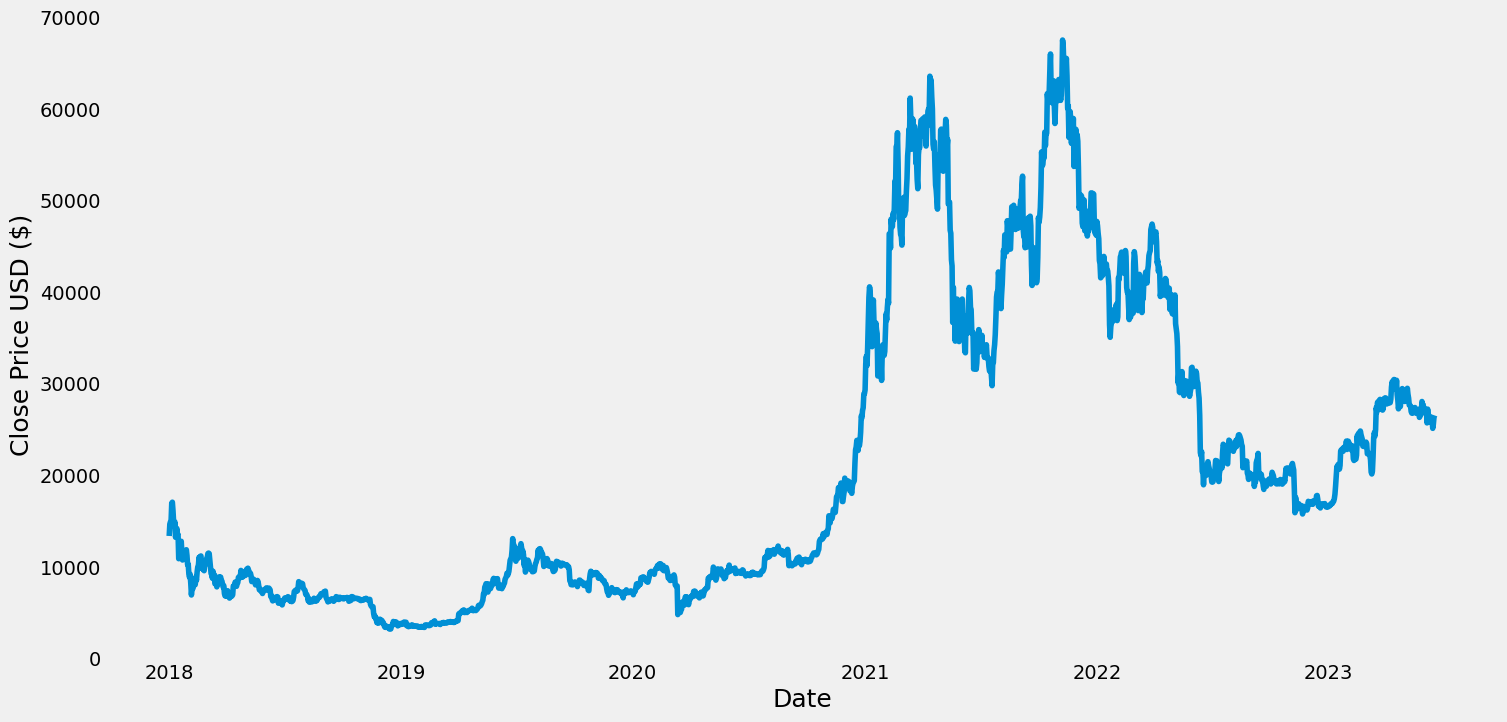

In [7]:
plt.figure(figsize = (16, 8))
#plt.title("Bitcoin Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.grid(False)
plt.savefig('history.png', dpi=300, transparent = True)
plt.show()

In [8]:
returns = df["Close"].pct_change().dropna().values

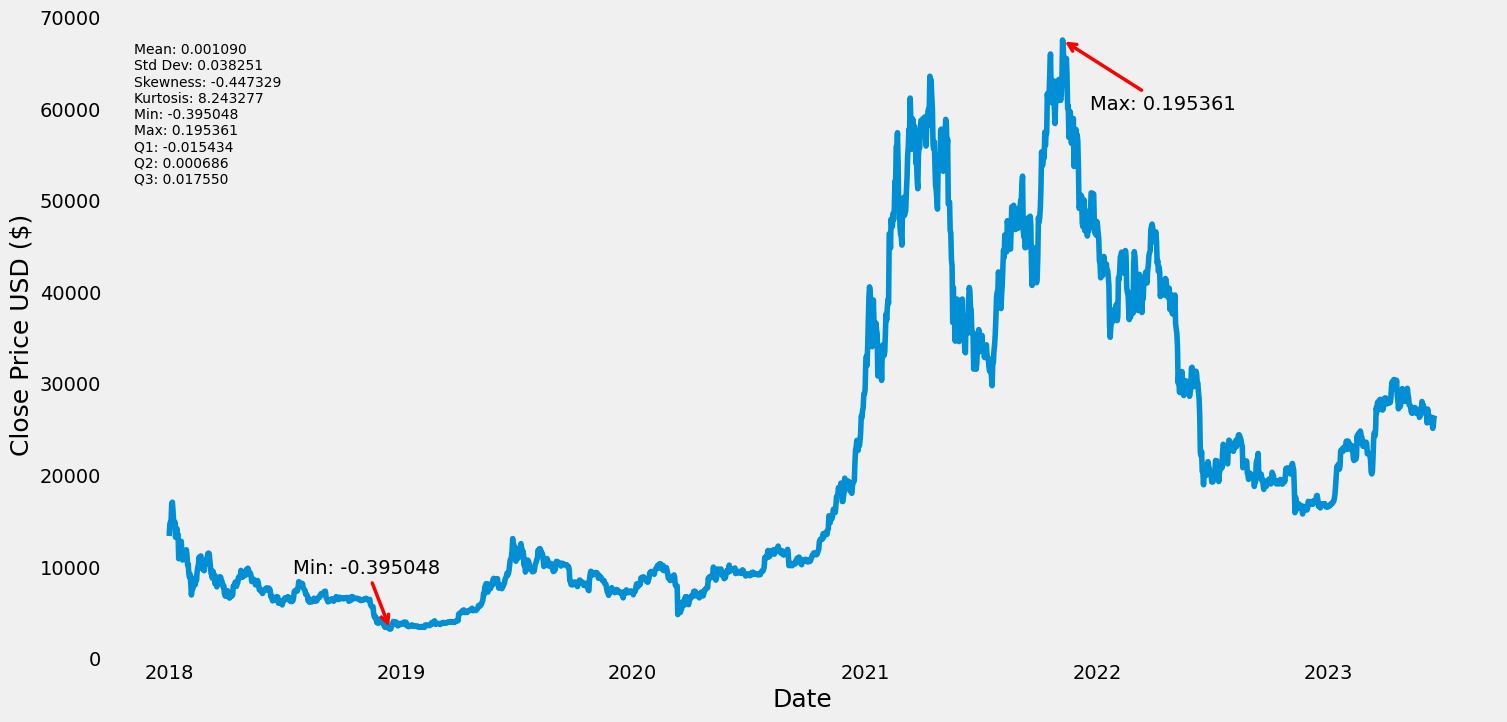

In [9]:
# Calculate the summary statistics
mean_return = np.mean(returns)
std_dev = np.std(returns)
skewness = pd.Series(returns).skew()
kurtosis = pd.Series(returns).kurtosis()
min_return = np.min(returns)
max_return = np.max(returns)
q1 = np.percentile(returns, 25)
q2 = np.percentile(returns, 50)
q3 = np.percentile(returns, 75)

# Plotting the price series with summary statistics
plt.figure(figsize = (16, 8))
#plt.title("Bitcoin Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)

# Add summary statistics to the plot
summary_text = f"Mean: {mean_return:.6f}\nStd Dev: {std_dev:.6f}\nSkewness: {skewness:.6f}\nKurtosis: {kurtosis:.6f}\nMin: {min_return:.6f}\nMax: {max_return:.6f}\nQ1: {q1:.6f}\nQ2: {q2:.6f}\nQ3: {q3:.6f}"
plt.text(0.02, 0.95, summary_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Add arrows to highlight specific values
arrow_properties = dict(facecolor='red', edgecolor='red', arrowstyle='->', linewidth=2.5)
plt.annotate(f'Max: {max_return:.6f}', xy=(df['Close'].idxmax(), df['Close'].max()), xytext=(20, -50),
             textcoords='offset points', arrowprops=arrow_properties)
plt.annotate(f'Min: {min_return:.6f}', xy=(df['Close'].idxmin(), df['Close'].min()), xytext=(-70, 40),
             textcoords='offset points', arrowprops=arrow_properties)

plt.grid(False)
plt.savefig('history_new.png', dpi=300, transparent = True)
plt.show()

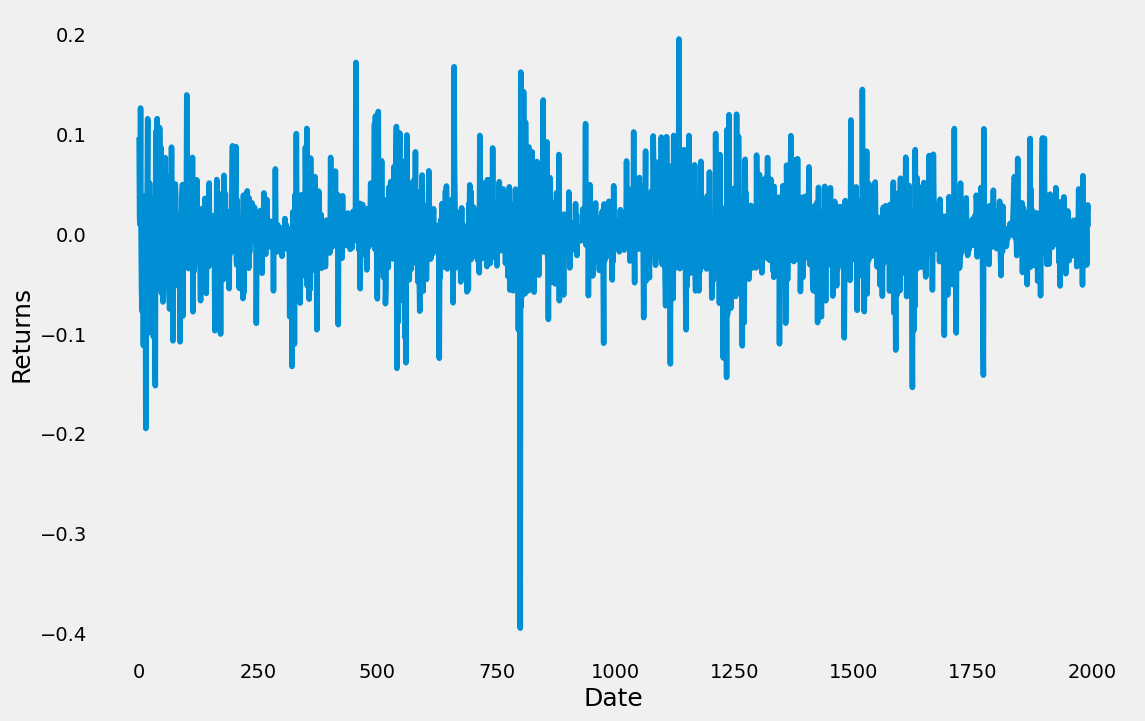

In [10]:
plt.figure(figsize = (12, 8))
#plt.title("Bitcoin returns history")
plt.plot(returns)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Returns", fontsize = 18)
plt.grid(False)
plt.savefig('returns_history.png', dpi=300)
plt.show()

In [11]:
returns

array([0.09679447, 0.01665405, 0.0093857 , ..., 0.01869941, 0.02916227,
       0.00754906])

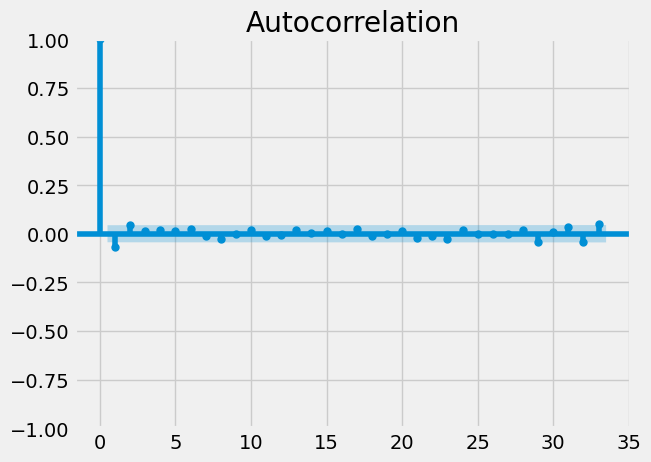

In [12]:
plot_acf(returns)
plt.show()

C:\Users\kaleem\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


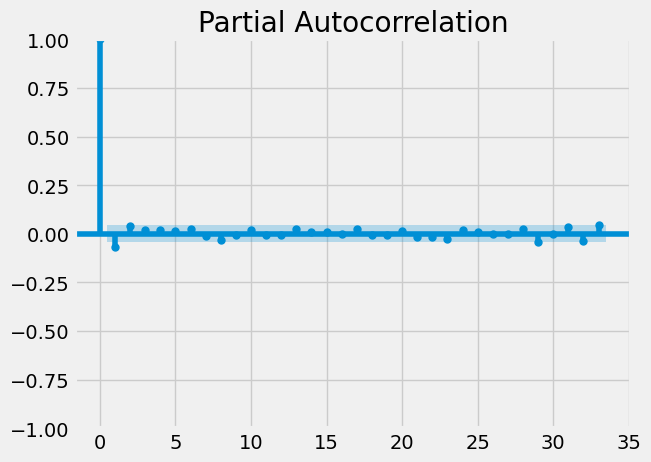

In [13]:
plot_pacf(returns)
plt.show()

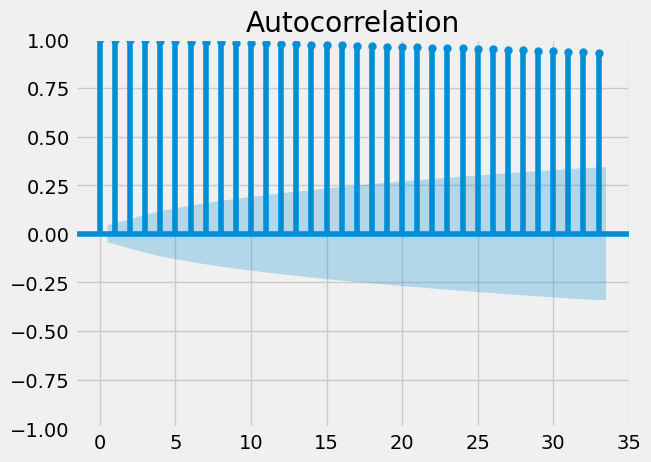

In [14]:
plot_acf(df["Close"])
plt.show()

In [15]:
data = df.filter(["Close"])
dataset = data.values
# Get the number of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1596

In [16]:
data

,Close
Close time,
2018-01-01,13380.00
2018-01-02,14675.11
2018-01-03,14919.51
2018-01-04,15059.54
2018-01-05,16960.39
...,...
2023-06-13,25934.25
2023-06-14,25128.60
2023-06-15,25598.49


In [17]:
dataset, dataset.shape

(array([[13380.  ],
        [14675.11],
        [14919.51],
        ...,
        [25598.49],
        [26345.  ],
        [26543.88]]),
 (1994, 1))

In [18]:
dataset.shape

(1994, 1)

In [19]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.15810341],
       [0.17824067],
       [0.18204077],
       ...,
       [0.34808489],
       [0.35969214],
       [0.36278447]])

### Feature Selection and Training

In [20]:
num_features = 80
# Create the scaled training dataset
train_data = scaled_data[0: training_data_len, :]
# Split the data into train and test sets
X_train = []
y_train = []

for i in range(num_features, len(train_data)):
    X_train.append(train_data[i - num_features:i, 0])
    y_train.append(train_data[i, 0])
    if i <= num_features:
        print(f"X_train = {X_train}, y_train = {y_train}")

X_train = [array([0.15810341, 0.17824067, 0.18204077, 0.18421805, 0.21377377,
       0.2154748 , 0.20117374, 0.18177691, 0.17396307, 0.18184765,
       0.15590762, 0.16370109, 0.17100882, 0.15958038, 0.16059011,
       0.11954266, 0.12092323, 0.12050622, 0.12848285, 0.14908424,
       0.12933834, 0.11736662, 0.11797504, 0.12653942, 0.12382275,
       0.12248137, 0.12873194, 0.1347796 , 0.12500025, 0.10924181,
       0.10998178, 0.09349115, 0.08802594, 0.09310927, 0.07732502,
       0.05796971, 0.0690427 , 0.06821645, 0.07109326, 0.08508553,
       0.08275416, 0.07544472, 0.08849193, 0.08284621, 0.09699691,
       0.10555024, 0.10803632, 0.12171248, 0.11151068, 0.12347648,
       0.12422266, 0.11235295, 0.10261076, 0.10758634, 0.10079888,
       0.09917388, 0.11058662, 0.11439667, 0.11062953, 0.11985364,
       0.12170393, 0.12831959, 0.12910511, 0.12815664, 0.11668917,
       0.10414946, 0.0942238 , 0.09352971, 0.08642738, 0.09829647,
       0.09204232, 0.09233246, 0.07709475, 0.078198

In [21]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
X_train.shape

(1516, 80)

In [23]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape

(1516, 80, 1)

### Model Training

In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model

In [25]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1), name = "LSTM_layer1"))
model.add(LSTM(50, return_sequences = False, name = "LSTM_layer2"))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_layer1 (LSTM)          (None, 80, 50)            10400     
                                                                 
 LSTM_layer2 (LSTM)          (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [27]:
!pip install graphviz

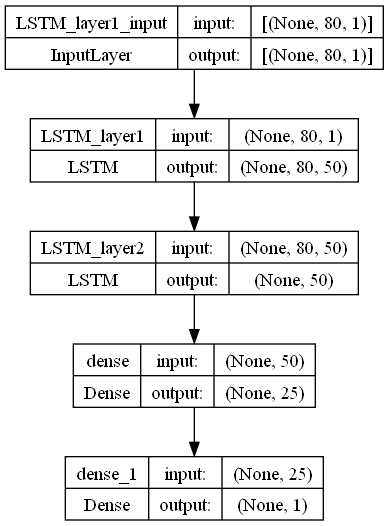

In [28]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
# Compile the model
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [30]:
model.fit(X_train, y_train, batch_size = 1, epochs = 25)

Epoch 1/25
1516/1516 [==============================] - 62s 38ms/step - loss: 0.0028
Epoch 2/25
1516/1516 [==============================] - 54s 36ms/step - loss: 0.0013
Epoch 3/25
1516/1516 [==============================] - 53s 35ms/step - loss: 8.9404e-04
Epoch 4/25
1516/1516 [==============================] - 51s 34ms/step - loss: 6.6534e-04
Epoch 5/25
1516/1516 [==============================] - 50s 33ms/step - loss: 6.7953e-04
Epoch 6/25
1516/1516 [==============================] - 54s 35ms/step - loss: 5.8867e-04
Epoch 7/25
1516/1516 [==============================] - 50s 33ms/step - loss: 6.7934e-04
Epoch 8/25
1516/1516 [==============================] - 53s 35ms/step - loss: 5.2798e-04
Epoch 9/25
1516/1516 [==============================] - 41s 27ms/step - loss: 5.4319e-04
Epoch 10/25
1516/1516 [==============================] - 36s 24ms/step - loss: 5.6171e-04
Epoch 11/25
1516/1516 [==============================] - 35s 23ms/step - loss: 5.5227e-04
Epoch 12/25
1516/1516 [====

### Testing the model

Create test dataset

In [31]:
test_data = scaled_data[training_data_len - num_features:, :]

In [32]:
test_data.shape

(478, 1)

Create X_test and y_test

In [33]:
X_test = []
y_test = dataset[training_data_len:, :]

for i in range(num_features, len(test_data)):
    X_test.append(test_data[i - num_features: i, 0])

In [34]:
X_test = np.array(X_test)

In [35]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test.shape

(398, 80, 1)

Predicting values for test data

In [36]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 19ms/step


In [37]:
predictions[:5], y_test[:5]

(array([[31426.459],
        [30158.072],
        [30844.588],
        [29146.148],
        [30689.33 ]], dtype=float32),
 array([[29874.01],
        [30444.93],
        [28715.32],
        [30319.23],
        [29201.01]]))

In [38]:
y_test.shape, predictions.shape

((398, 1), (398, 1))

Root Mean Squared Error(RMSE)

In [39]:
rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
rmse

757.5878353682913

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

573939.3282980132

In [41]:
data[training_data_len:]

,Close
Close time,
2022-05-16,29874.01
2022-05-17,30444.93
2022-05-18,28715.32
2022-05-19,30319.23
2022-05-20,29201.01
...,...
2023-06-13,25934.25
2023-06-14,25128.60
2023-06-15,25598.49


In [42]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

C:\Users\kaleem\AppData\Local\Temp\ipykernel_19152\2096051634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


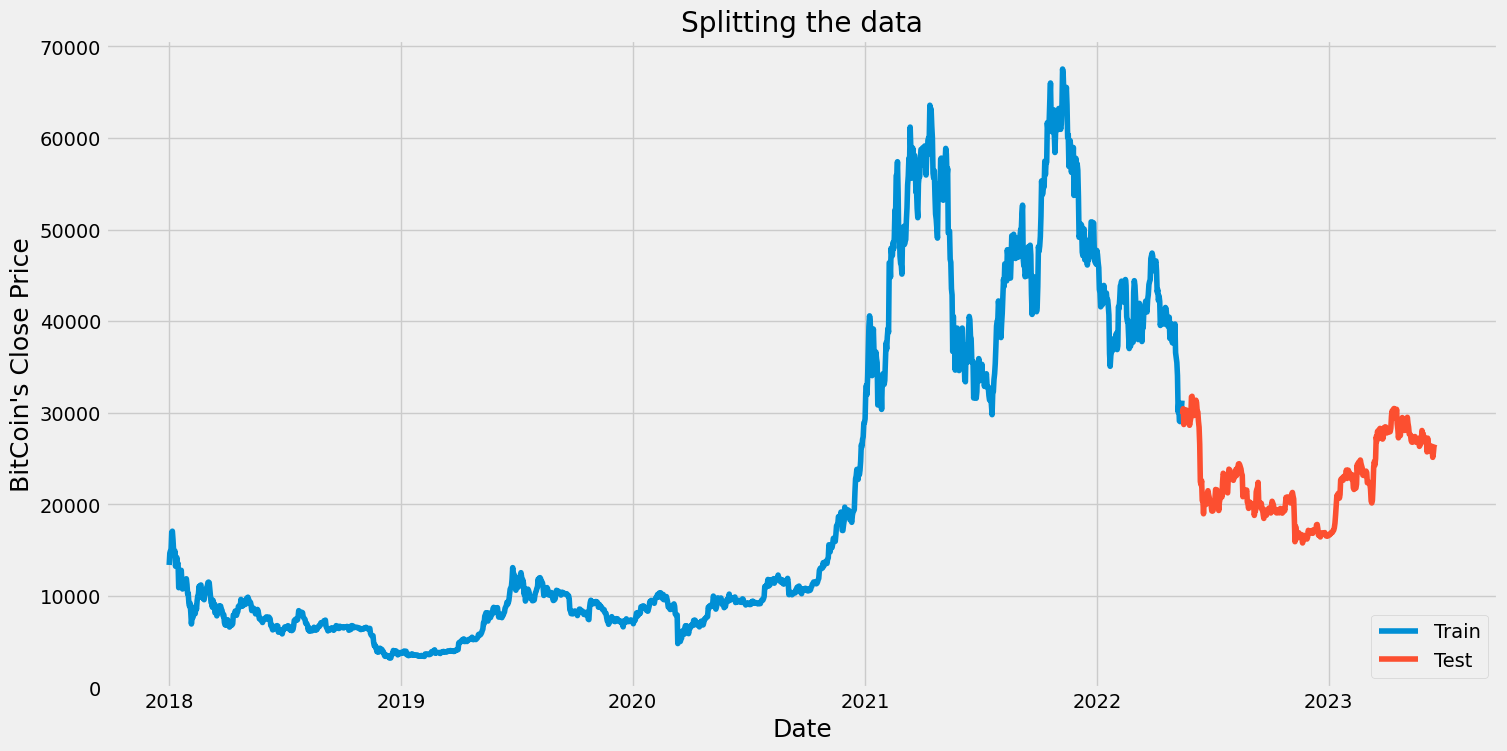

In [43]:
plt.figure(figsize = (16, 8))
plt.title("Splitting the data")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("BitCoin's Close Price", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close"]])
plt.legend(["Train", "Test"], loc = "lower right")
plt.savefig('split.png', dpi=300)
plt.show()

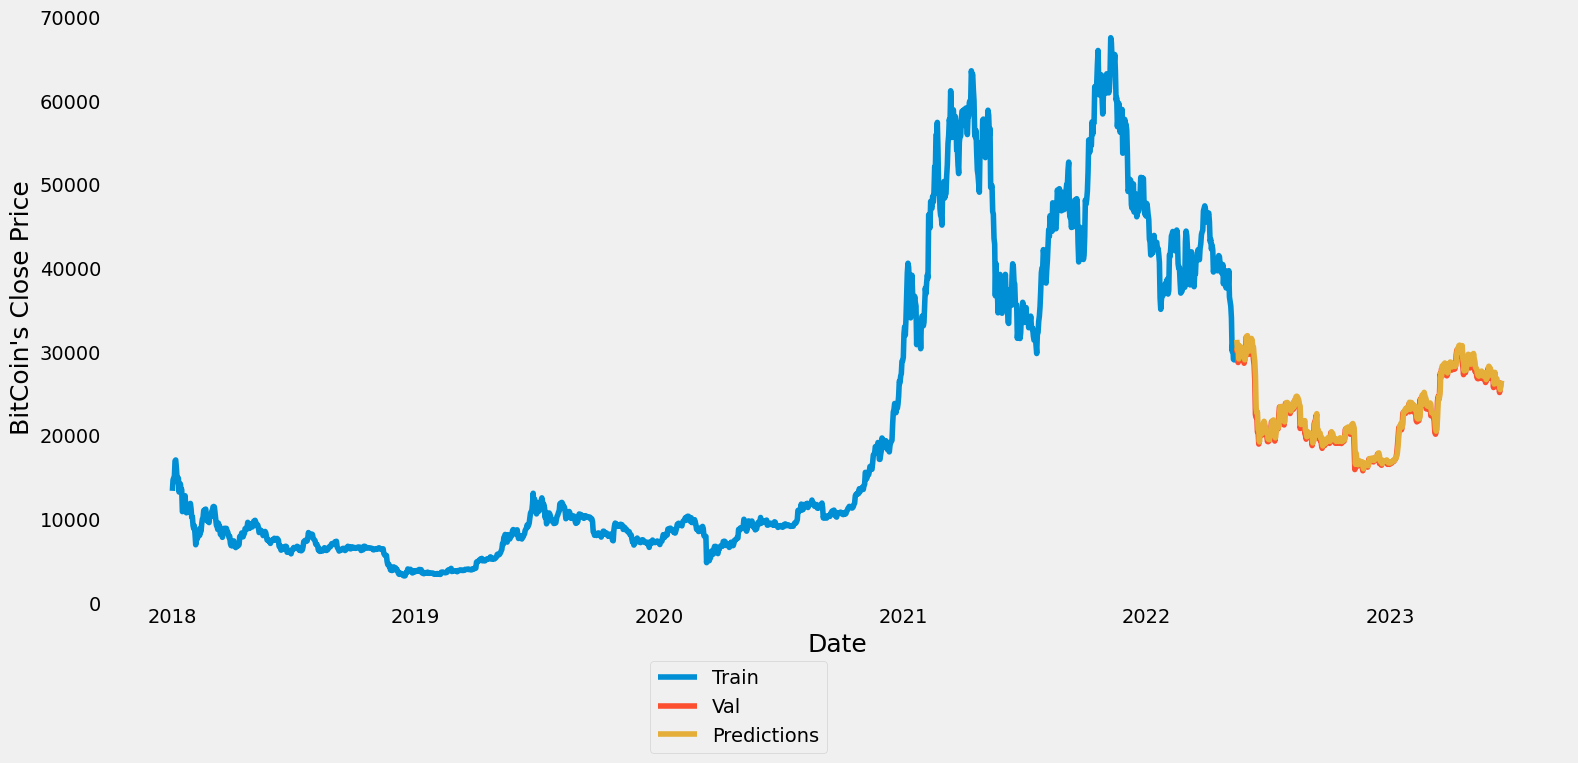

In [47]:
plt.figure(figsize = (16, 8))
#plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("BitCoin's Close Price", fontsize = 18)
plt.grid(False)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], bbox_to_anchor =(0.5,-0.27), loc = "lower right")
plt.tight_layout()
plt.savefig('forecast.png', dpi=300)
plt.show()